Text(0, 0.5, 'Accuracy')

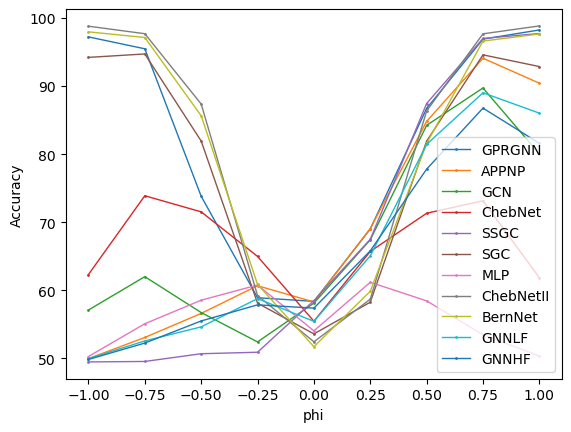

In [5]:
import os
import json
import matplotlib.pyplot as plt
import re
import glob

folder_path = './results/'
acc_data = {}
x = [ -1 , -0.75 , -0.5 , -0.25 , 0 , 0.25 , 0.5 , 0.75 , 1 ]
# 遍历文件夹中的所有文件
file_list = glob.glob(os.path.join(folder_path, "best_res_log_*"))

for file_name in file_list:
    acc_data[file_name] = []
    if file_name.endswith('.txt'):  # 确保是 JSON 文件
        file_path = file_name
        with open(file_path, 'r') as f:
            data = json.load(f)
            #dataset_values = ["cSBM_-0.5","cSBM_-1","cSBM_-0.75","cSBM_-0.25","cSBM_0.0","cSBM_0.5", "cSBM_0.25","cSBM_0.75","cSBM_1"]
            dataset_values = ['cSBM_-1','cSBM_-0.75','cSBM_-0.5','cSBM_-0.25','cSBM_0.0','cSBM_0.25','cSBM_0.5','cSBM_0.75','cSBM_1']
            for dataset in dataset_values:
                #print(data[dataset]['test_acc'])
                acc_data[file_name].append(data[dataset]['test_acc'])
                modlename = re.search(r'(\w+)', file_name.split('_')[-1])
                
            # 绘制多条折线并添加标记点
    plt.plot(x, acc_data[file_name] , label=modlename.group(0),marker='o',linewidth=1,markersize=1)  
    plt.legend()

plt.xlabel('phi')  # x 轴标签
plt.ylabel('Accuracy')  # y 轴标签
    
    



C:\Users\APTX4\AppData\Local\Temp\ipykernel_29020\2707535751.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load('save_parameters/BernNet_BernNet_model_

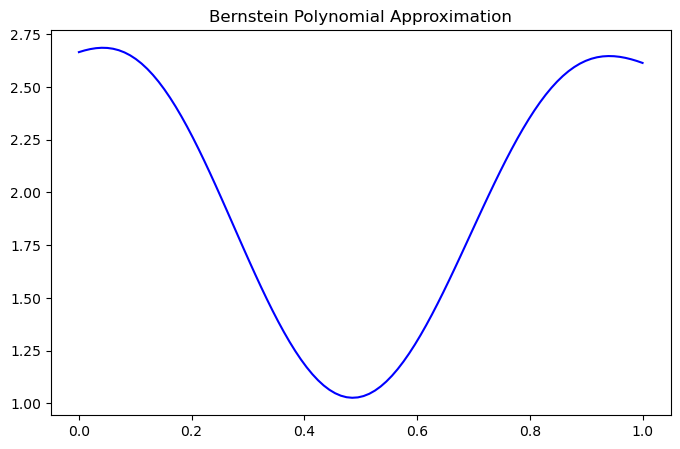

In [32]:
import torch
import matplotlib.pyplot as plt

import numpy as np
from scipy.special import comb

def bernstein_poly(k, K, x):
    return comb(K, k) * (x ** k) * ((1 - x) ** (K - k))
def bernstein_approx(theta_k, K, x):
    f = np.zeros_like(x)
    for k in range(K + 1):
        f += theta_k[k] * bernstein_poly(k, K, x)
    return f

# 加载模型参数
params = torch.load('save_parameters/BernNet_BernNet_model_ch.pt')

# 提取 theta_k
theta_k = params['prop1.temp'].detach().cpu().numpy()
K = len(theta_k) - 1

# 生成 x 值
x = np.linspace(0, 1, 100)

# 计算伯恩斯坦多项式逼近函数
f = bernstein_approx(theta_k, K, x)

# 绘制图像
plt.figure(figsize=(8, 5))
plt.plot(x, f, color='b', label='Bernstein Approximation')
plt.title('Bernstein Polynomial Approximation')
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.legend()
# plt.grid(True)
plt.show()

[0.         0.00708572 0.01417144 0.02125715 0.02834287 0.03542859
 0.04251431 0.04960003 0.05668574 0.06377146 0.07085718 0.0779429
 0.08502862 0.09211433 0.09920005 0.10628577 0.11337149 0.12045721
 0.12754292 0.13462864 0.14171436 0.14880008 0.1558858  0.16297151
 0.17005723 0.17714295 0.18422867 0.19131438 0.1984001  0.20548582
 0.21257154 0.21965726 0.22674297 0.23382869 0.24091441 0.24800013
 0.25508585 0.26217156 0.26925728 0.276343   0.28342872 0.29051444
 0.29760015 0.30468587 0.31177159 0.31885731 0.32594303 0.33302874
 0.34011446 0.34720018 0.3542859  0.36137162 0.36845733 0.37554305
 0.38262877 0.38971449 0.39680021 0.40388592 0.41097164 0.41805736
 0.42514308 0.4322288  0.43931451 0.44640023 0.45348595 0.46057167
 0.46765739 0.4747431  0.48182882 0.48891454 0.49600026 0.50308597
 0.51017169 0.51725741 0.52434313 0.53142885 0.53851456 0.54560028
 0.552686   0.55977172 0.56685744 0.57394315 0.58102887 0.58811459
 0.59520031 0.60228603 0.60937174 0.61645746 0.62354318 0.63062

C:\Users\APTX4\AppData\Local\Temp\ipykernel_29020\280325346.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load('./save_parameters/BernNet_model.pt')


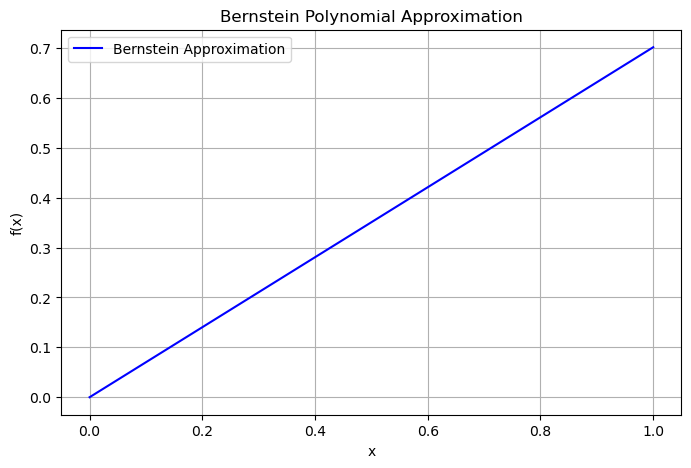

In [24]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

# 定义公式
def bernstein_formula(x, theta_k, K):
    result = np.zeros_like(x)
    for k in range(K + 1):
        result += theta_k[k] * (1 / (2 ** K)) * comb(K, k) * x
    return result

# 生成 x 值
x = np.linspace(0, 1, 100)  # 在 [0, 1] 区间生成 100 个点
params = torch.load('save_parameters/BernNet_model_BernNet_cora.pt')

# 假设 theta_k 和 K 已知
theta_k = params['prop1.temp'].detach().cpu().numpy()
K = len(theta_k) - 1

# 计算 Z(x)
Z = bernstein_formula(x, theta_k, K)
print(Z)

# 绘制图像
plt.figure(figsize=(8, 5))
plt.plot(x, Z, color='b', label='Bernstein Approximation')
plt.title('Bernstein Polynomial Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

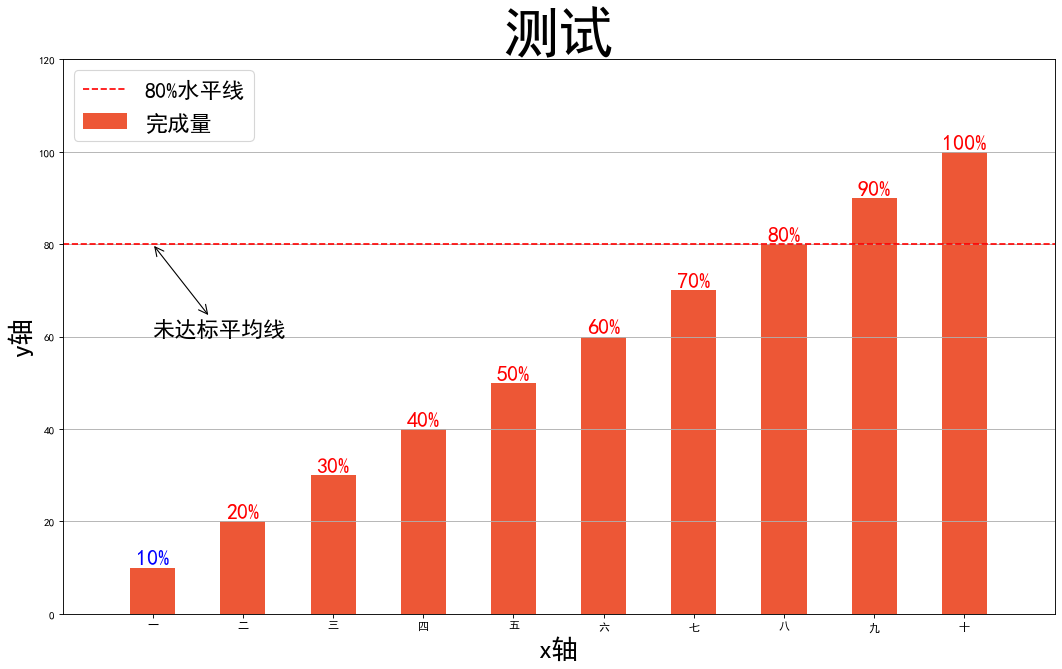

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
#mpl.rcParams['font.sans-serif'] = ['Songti SC'] #苹果电脑默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

y = np.arange(10, 101, 10)
x = np.arange(1, 11)
label = ["一", "二", "三", "四", "五", "六", "七", "八", "九", "十"]
plt.figure(figsize=(16, 9), dpi=80)
plt.bar(x, y, width=0.5, label="完成量", color="#ed5736")
plt.xticks(np.arange(1, 11, 1), label)
plt.title("测试", fontsize=50)

plt.text(1, 10, "10%", weight="bold", color="b", fontsize=20, ha="center", va="bottom")
plt.text(2, 20, "20%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(3, 30, "30%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(4, 40, "40%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(5, 50, "50%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(6, 60, "60%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(7, 70, "70%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(8, 80, "80%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(9, 90, "90%", weight="bold", color="r", fontsize=20, verticalalignment='bottom', horizontalalignment="center")
plt.text(10, 100, "100%", weight="bold", color="r", fontsize=20, verticalalignment='bottom',horizontalalignment="center")
plt.annotate("未达标平均线", xy=(1, 80), arrowprops=dict(arrowstyle="<->"), fontsize=20, xytext=(1, 60))
plt.ylim(0, 120)
plt.xlim(0, 11)
plt.axhline(80, linestyle="--", color="r", label="80%水平线", )
plt.xlabel("x轴", fontsize=24)
plt.ylabel("y轴", fontsize=24)
plt.legend(loc="upper left", fontsize=20)
plt.grid( axis="y", )
plt.show() #可以了